KNN to predict customers who are likely to churn

In [84]:
##import needed modules
from pandas import Series, DataFrame
import pandas as pd
from patsy import dmatrices
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn import neighbors
%pylab inline
import copy

# import the file
df=pd.read_csv('Churn_Modelling.csv',error_bad_lines=False)

Populating the interactive namespace from numpy and matplotlib


C:\Users\Nimesh\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['copy']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [85]:
# Drop unnecessary columns

dfdrop=df.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)
#create design matrices
Y,X=dmatrices('Exited ~ 0 + CreditScore + Geography + Gender + Age + Tenure + Balance + NumOfProducts + HasCrCard + IsActiveMember + EstimatedSalary', dfdrop, return_type="dataframe")

Random Sample KNN

In [86]:
#split up data into training and testing set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

#set up the classifier
model=neighbors.KNeighborsClassifier(n_neighbors=30,weights='uniform',p=2)

#fit the classifier
model.fit(X_train,y_train)

#run on training data
from sklearn import metrics
Pred_train=model.predict(X_train)
print ("Model accuracy of training dataset is: ",metrics.accuracy_score(y_train, Pred_train)) 


# Predict accuracy on test dataset
pred_test=model.predict(X_test)
print ("Model accuracy of test dataset is: ", metrics.accuracy_score(y_test, pred_test)) 


C:\Users\Nimesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


Model accuracy of training dataset is:  0.7978571428571428
Model accuracy of test dataset is:  0.7923333333333333


In [87]:
#Varying model paramters
from sklearn import model_selection
kfold = model_selection.StratifiedKFold(n_splits=3).split(X=X[:6], y=[0,0,0,1,1,1])
for train, holdout in kfold:
    print('train indices =', train, 'holdout indices =', holdout)

train indices = [1 2 4 5] holdout indices = [0 3]
train indices = [0 2 3 5] holdout indices = [1 4]
train indices = [0 1 3 4] holdout indices = [2 5]


In [133]:
nn =[10,20,30,40,50,60,70,80,90,100]

In [134]:
def cv_accuracy_score(X, y, nn):
    """For each fold, fit the nearest neighbors model
    with nn nearest neighbors on the train, and return accuracy
    on the test."""
    
    model = neighbors.KNeighborsClassifier(n_neighbors=nn,
                                           weights='uniform')
    accuracies = []
    
    kfold = model_selection.StratifiedKFold(n_splits=3, shuffle=True).split(X, y)
    for train, holdout in kfold:
        # Select the training and testing data using the indices
        # provided by kfold
        X_train = X.iloc[train]
        X_holdout = X.iloc[holdout]
        y_train = y.iloc[train]
        y_holdout = y.iloc[holdout]
        
        # Fit the model
        model.fit(X_train, y_train)
        
        # Compute test accuracy
        accuracy = metrics.accuracy_score(y_holdout, model.predict(X_holdout))
        accuracies.append(accuracy)
    
    average_accuracy = sum(accuracies) * 1.0 / len(accuracies)
    return average_accuracy

In [ ]:
#Get the corresponding cross-validation accuracy scores
scores= [cv_accuracy_score(X, Y, num_nbrs) for num_nbrs in nn]

In [136]:
scores

[0.7906997358404108,
 0.79630008591741,
 0.7961999859254072,
 0.7962999959264073,
 0.7962999959264073,
 0.7962999959264073,
 0.7962999959264073,
 0.7962999959264073,
 0.7962999959264073,
 0.7962999959264073]

Text(0, 0.5, 'Accuracy of classifier')

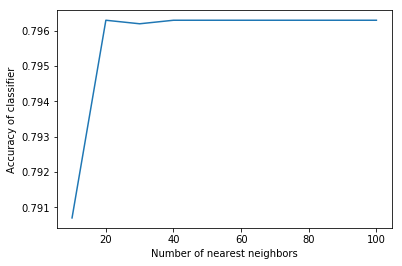

In [137]:
#plot accuracy scores versus the number of nearest neighbors
plot(nn, scores)
xlabel('Number of nearest neighbors')
ylabel('Accuracy of classifier')

Finding:
k~ 25-30 looks like it would be good